# **차량 공유업체의 차량 파손 여부 분류하기**

## 0.미션

* 1) 미션1 : Data Preprocessing
    - **과제 수행 목표**
        - 모델링 수행을 위해 적절한 폴더 및 파일로 **일관성 있게 정리**해야 합니다.
        - 제공된 데이터 : Car_Images.zip
            * Car_Images : 차량의 정상/파손 이미지 무작위 수집

* 2) 미션2 : CNN 모델링
    - **과제 수행 목표**
        - Tensorflow Keras를 이용하여 모델을 3개 이상 생성하세요.
            - 모델 구조와 파라미터는 자유롭게 구성하세요.
            - 단, 세부 목차에서 명시한 부분은 지켜주세요.

* 3) 미션3 : Data Augmentation & Transfer Learning
    - **과제 수행 목표**
        - 성능 개선을 위해 다음의 두가지를 시도하세요.
            * Data Augmentation을 적용하세요.(Image Generator)
            * Transfer Learning(VGG16)
* 성능 가이드
    * Accuracy : 0.34~0.74

## 1.환경설정

* **세부 요구사항**
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 구글 드라이브 바로 밑에 project 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 라이브러리 불러오기

In [ ]:
import zipfile, os, random, shutil, glob, yaml, json
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

### (3) 데이터 불러오기

#### 1) 데이터 압축 해제

In [ ]:
path = '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/'

In [ ]:
file1 = 'Car_Images.zip'
path + file1

'/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/Car_Images.zip'

In [ ]:
# 압축 해제

data = zipfile.ZipFile(path+file1)

try :
    print('압축을 해제합니다.')
    data.extractall(path)
    print('압축 해제가 완료되었습니다.')
except :
    pass
    print('압축이 이미 해제되었거나 이미 폴더가 존재합니다.')

압축을 해제합니다.
압축 해제가 완료되었습니다.


#### 2) 데이터 조회

In [ ]:
# 폴더별 이미지 데이터 갯수 확인

print(f"정상 차량 이미지 데이터는 {len(glob.glob(path+'normal/*'))}장 입니다.")
print(f"파손 차량 이미지 데이터는 {len(glob.glob(path+'abnormal/*'))}장 입니다.")

정상 차량 이미지 데이터는 302장 입니다.
파손 차량 이미지 데이터는 303장 입니다.


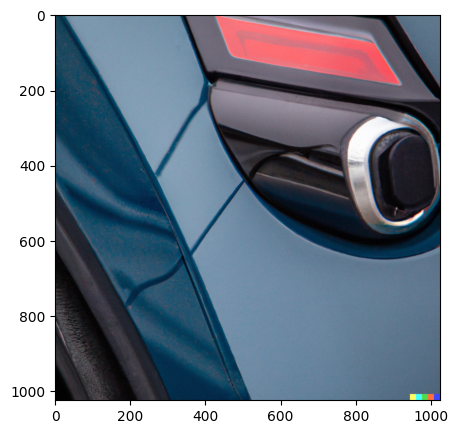

이미지 데이터의 형태는 다음과 같습니다 : (1024, 1024, 3)


In [ ]:
# 정상 차량 랜덤 이미지 확인 및 형태 확인

rand_n = random.randint( 0, len(glob.glob(path+'normal/*'))-1 )

plt.figure(figsize=(5,5))
img = plt.imread(glob.glob(path+'normal/*')[rand_n])
plt.imshow(img)
plt.show()

print(f'이미지 데이터의 형태는 다음과 같습니다 : {img.shape}')

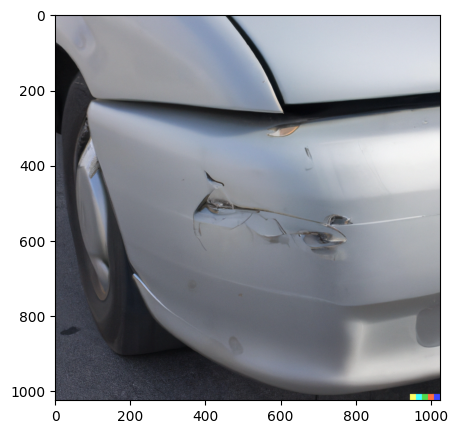

이미지 데이터의 형태는 다음과 같습니다 : (1024, 1024, 3)


In [ ]:
# 파손 차량 랜덤 이미지 확인 및 형태 확인

rand_n = random.randint( 0, len(glob.glob(path+'abnormal/*'))-1 )

plt.figure(figsize=(5,5))
img = plt.imread(glob.glob(path+'abnormal/*')[rand_n])
plt.imshow(img)
plt.show()

print(f'이미지 데이터의 형태는 다음과 같습니다 : {img.shape}')

## 2.데이터 전처리

### (1) 모델링 I용 전처리
* 모델링을 위한 데이터 구조 만들기
    * X : 이미지를 array로 변환합니다.
    * Y : 이미지 갯수만큼 normal - 0, abnormal - 1 로 array를 만듭니다.

#### 1) Y : 클래스 만들기
- **세부요구사항**
    - 전체 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [ ]:
normal = glob.glob(path +'normal/*')
abnormal = glob.glob(path+'abnormal/*')

In [ ]:
y_normal = np.array([0 for i in normal])
y_abnormal = np.array([1 for i in abnormal])

In [ ]:
y = np.concatenate([y_normal, y_abnormal])

In [ ]:
len(normal), len(abnormal)

(302, 303)

#### 2) X : 데이터 리스트 통합
- **세부요구사항**
    - 전체 이미지 데이터를 하나의 리스트로 통합합니다.

In [ ]:
x= normal + abnormal
len(x)

605

#### 3) 데이터셋 분리
- **세부요구사항**
    - 데이터 스플릿의 비율은 train set : validation set : test set = 8 : 1: 1 로 설정하세요.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(x_test)

(484, 484, 60, 60, 61, 61)

In [ ]:
x_train

['/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/normal/DALLíñE 2023-03-11 14.28.25 - part of a car.png',
 '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/normal/DALLíñE 2023-03-10 22.07.07 - photo of a part of car.png',
 '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/normal/DALLíñE 2023-03-11 14.25.48 - part of a car.png',
 '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/abnormal/DALLíñE 2023-03-11 01.22.25 - scratched car.png',
 '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/abnormal/DALLíñE 2023-03-11 14.58.17 - dents of a car.png',
 '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/normal/DALLíñE 2023-03-11 01.01.20 - photo of a part of car.png',
 '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/abnormal/DALLíñE 2023-03-1

#### 4) X : image to array
- **세부요구사항**
    * 모델링을 위해서는 np.array 형태로 데이터셋을 만들어야 합니다.
    * Training set / Validation set / Test set의 X는 이미지 형태로 되어있습니다.
    * 이미지 파일을 불러와 Training data, Validation data, Test data 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

In [ ]:
len(x_train)

484

In [ ]:
import os
from keras.utils import load_img, img_to_array

train=[]
val=[]
test=[]

In [ ]:
import os
from keras.utils import load_img, img_to_array

train=[]
val=[]
test=[]

for img in x_train:
    image = load_img(img, target_size=(280, 280, 3))
    array = img_to_array(image)
    train.append(array)

for img in x_val:
    image = load_img(img, target_size=(280, 280, 3))
    array = img_to_array(image)
    val.append(array)

for img in x_test:
    image = load_img(img, target_size=(280, 280, 3))
    array = img_to_array(image)
    test.append(array)

In [ ]:
train = np.array(train)
val = np.array(val)
test = np.array(test)


In [ ]:
train.shape

(484, 280, 280, 3)

### (2) 모델링 II용 전처리

#### 1) 데이터셋 분리를 위한 폴더 생성
- **세부요구사항**
    - train, validation, test 데이터셋을 만들기 위해 각각 폴더를 생성하고, 하위 폴더 normal과 abnormal을 생성합니다.
        * 정상 이미지 저장소
            - project/Car_Images_train/normal/
            - project/Car_Images_val/normal/
            - project/Car_Images_test/normal/
        * 파손 이미지 저장소
            - project/Car_Images_train/abnormal/
            - project/Car_Images_val/abnormal/
            - project/Car_Images_test/abnormal/
---
- 직접 탐색기에서 폴더를 생성할 수도 있고, os 모듈을 이용하여 코드로 작성할 수도 있습니다.
    - 참고 자료 : [os document](https://docs.python.org/3/library/os.html)

In [ ]:
os.makedirs(path+'Car_Images_train/normal/')
os.makedirs(path+'Car_Images_train/abnormal/')
os.makedirs(path+'Car_Images_val/normal/')
os.makedirs(path+'Car_Images_val/abnormal/')
os.makedirs(path+'Car_Images_test/normal/')
os.makedirs(path+'Car_Images_test/abnormal/')


#### 2) 각 폴더에 이미지 데이터 복사
- **세부요구사항**
    - 이전 단계에서 생성한 폴더 normal, abnormal 각각에 이미지 파일을 복사합니다.
    - 데이터 스플릿의 비율은 train set : validation set : test set = 8 : 1 : 1 로 설정하세요.

In [ ]:
normal2 = glob.glob(path+'normal/*')
abnormal2 = glob.glob(path+'abnormal/*')

In [ ]:
y_normal2 = [0 for i in normal2]
y_abnormal2 = [1 for i in abnormal2]

In [ ]:
x2= normal2+abnormal2
y2= y_normal2+y_abnormal2

In [ ]:
x_train2, x_temp2, y_train2, y_temp2 = train_test_split(x2, y2, test_size=0.2, random_state=42)
x_val2, x_test2, y_val2, y_test2 = train_test_split(x_temp2, y_temp2, test_size=0.5, random_state=42)


In [ ]:
len(x_train2),len(x_test2),len(x_val2)

(484, 61, 60)

In [ ]:
from PIL import Image

for i in range(len(y_train2)):
    x_name = x_train2[i]
    y_type = y_train2[i]
    folder_path=''
    if y_type ==0:
        folder_path = '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/Car_Images_train/normal'
    else:
        folder_path = '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/Car_Images_train/abnormal'
    img = Image.open(x_name)
    img.save(folder_path + x_name.split('/')[-1])

for i in range(len(y_val2)):
    x_name = x_val2[i]
    y_type = y_val2[i]
    folder_path=''
    if y_type ==0:
        folder_path = '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/Car_Images_val/normal'
    else:
        folder_path = '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/Car_Images_val/abnormal'
    img = Image.open(x_name)
    img.save(folder_path + x_name.split('/')[-1])

for i in range(len(y_test2)):
    x_name = x_test2[i]
    y_type = y_test2[i]
    folder_path=''
    if y_type ==0:
        folder_path = '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/Car_Images_test/normal'
    else:
        folder_path = '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/Car_Images_test/abnormal'
    img = Image.open(x_name)
    img.save(folder_path + x_name.split('/')[-1])

#### 3) Y : 클래스 만들기
- **세부요구사항**
    - Test용 데이터에 대한 Y를 생성합니다.
    - normal, abnormal 데이터의 수를 확인하고 normal을 0, abnormal을 1로 지정합니다.

In [ ]:
set(y_test)

{0, 1}

#### 4) X : image to array
- **세부요구사항**
    * 모델링 II에서는 ImageDataGenerator를 이용하기 때문에 Test data에 대해서만 np.array 형태로 데이터셋을 만들어야 합니다.
    * 이미지 파일을 불러와 Test data 각각 array 형태로 변환해 봅시다.
        * 각 폴더로 부터 이미지 목록을 만들고
        * 이미지 한장씩 적절한 크기로 로딩하여 (keras.utils.load_img)
            * 이미지가 너무 크면 학습시간이 많이 걸리고, 메모리 부족현상이 발생될 수 있습니다.
            * 이미지 크기를 280 * 280 * 3 이내의 크기를 설정하여 로딩하시오.
            * array로 변환 (keras.utils.img_to_array, np.expand_dims)
        * 데이터셋에 추가합니다.(데이터셋도 array)

In [ ]:
import os
from keras.preprocessing.image import load_img, img_to_array
test_array=[]

for img in x_test2:
    image = load_img(img, target_size=(280, 280,3))
    array = img_to_array(image)
    test_array.append(array)

test_array = np.array(test_array)

In [ ]:
train

array([[[[199., 199., 200.],
         [201., 201., 203.],
         [199., 198., 201.],
         ...,
         [105., 112., 128.],
         [107., 119., 135.],
         [107., 118., 129.]],

        [[198., 198., 196.],
         [201., 204., 202.],
         [199., 199., 200.],
         ...,
         [105., 112., 126.],
         [106., 115., 130.],
         [102., 113., 128.]],

        [[200., 201., 202.],
         [200., 201., 203.],
         [202., 201., 202.],
         ...,
         [111., 116., 135.],
         [109., 116., 133.],
         [108., 116., 131.]],

        ...,

        [[117., 111., 106.],
         [113., 107., 100.],
         [111., 106., 102.],
         ...,
         [ 60.,  70., 255.],
         [ 60.,  70., 255.],
         [ 60.,  70., 255.]],

        [[107., 107., 101.],
         [119., 112., 109.],
         [109., 106., 100.],
         ...,
         [ 60.,  70., 255.],
         [ 60.,  70., 255.],
         [ 60.,  70., 255.]],

        [[115., 110., 105.],
       

## 3.모델링 I
* **세부요구사항**
    * 모델을 최소 3개 이상 만들고 성능을 비교합니다.
        * 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
        * 전처리 과정에서 생성한 Validation set을 적절하게 사용하세요.
        * Early Stopping을 반드시 사용하세요.
            * 최적의 가중치를 모델에 적용하세요.

### (1) 모델 1
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import *
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, MaxPool2D, Conv2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Add, Concatenate
from sklearn.metrics import  confusion_matrix
import matplotlib.pyplot as plt

#### 1) 구조 설계

In [ ]:
y_train.shape

(484,)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.backend import clear_session
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l1

l1_reg = tf.keras.regularizers.l1(0.01)

clear_session()

il = Input(shape=(280, 280, 3))

hl = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l1_reg)(il)
hl = BatchNormalization()(hl)
hl = MaxPooling2D(pool_size=(2,2), strides=(2,2))(hl)

hl = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l1_reg)(hl)
hl = BatchNormalization()(hl)
hl = MaxPooling2D(pool_size=(2,2), strides=(2,2))(hl)

hl = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l1_reg)(hl)
hl = BatchNormalization()(hl)
hl = MaxPooling2D(pool_size=(2,2), strides=(2,2))(hl)

hl = Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l1_reg)(hl)
hl = BatchNormalization()(hl)
hl = MaxPooling2D(pool_size=(2,2), strides=(2,2))(hl)

hl = Flatten()(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dense(512, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.25)(hl)
ol = Dense(1, activation='sigmoid')(hl)

model3 = Model(il, ol)

model3.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'],
              optimizer=Adam())

model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 280, 280, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 140, 140, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 140, 140, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 140, 140, 32)      128   

#### 2) 학습

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0.1,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

hist3 = model3.fit(train, y_train, validation_data=(val, y_val),
                 batch_size=16, epochs=1000, callbacks=[es], verbose=1)

Epoch 1/1000
31/31 [==============================] - 18s 108ms/step - loss: 14.6254 - accuracy: 0.7748 - val_loss: 14.6531 - val_accuracy: 0.5167
Epoch 2/1000
31/31 [==============================] - 1s 45ms/step - loss: 12.3154 - accuracy: 0.8636 - val_loss: 11.7471 - val_accuracy: 0.4833
Epoch 3/1000
31/31 [==============================] - 1s 43ms/step - loss: 9.8561 - accuracy: 0.8988 - val_loss: 9.1303 - val_accuracy: 0.6500
Epoch 4/1000
31/31 [==============================] - 1s 43ms/step - loss: 7.7056 - accuracy: 0.9194 - val_loss: 7.1342 - val_accuracy: 0.6500
Epoch 5/1000
31/31 [==============================] - 1s 43ms/step - loss: 5.7767 - accuracy: 0.9463 - val_loss: 6.3248 - val_accuracy: 0.4667
Epoch 6/1000
31/31 [==============================] - 1s 43ms/step - loss: 4.2247 - accuracy: 0.9483 - val_loss: 5.3971 - val_accuracy: 0.4167
Epoch 7/1000
31/31 [==============================] - 1s 45ms/step - loss: 3.0675 - accuracy: 0.9463 - val_loss: 4.1006 - val_accuracy: 

In [ ]:
model3.evaluate(test, y_test)

2/2 [==============================] - 1s 442ms/step - loss: 1.4260 - accuracy: 0.7541


[1.4259896278381348, 0.7540983557701111]

In [ ]:
pred_proba = model3.predict(test)
pred = (pred_proba >=0.5).astype('int')
print(classification_report(y_test, pred))

2/2 [==============================] - 1s 28ms/step
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.72      0.79      0.75        29

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

### (2) 모델 2
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

In [ ]:
# 세션 클리어
keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(280, 280, 3))
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(il)
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Flatten()(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dropout(0.2)(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 모델 선언
model2 = Model(il, ol)

# 컴파일
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 280, 280, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 140, 140, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 140, 140, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 140, 140, 128)     147584    
                                                             

#### 2) 학습

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

### (3) 모델 3
- **세부요구사항**
    - Conv2D, MaxPooling2D, Flatten, Dense 레이어들을 이용하여 모델을 설계
    - 학습시 validation_data로 validation set을 사용하시오.
    - 반드시 Early Stopping 적용
    - 평가시, confusion matrix, accuracy, recall, precision, f1 score 등을 이용하시오.

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) 구조 설계

#### 2) 학습

#### 3) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

## 4.모델링 II
* **세부요구사항**
    - 성능을 높이기 위해서 다음의 두가지를 시도해 봅시다.
        - Data Augmentation을 통해 데이터를 증가 시킵니다.
        - 사전 학습된 모델(Transfer Learning)을 가져다 사용해 봅시다.

### (1) Data Augmentation
- **세부요구사항**
    * 모델 학습에 이용할 이미지 데이터를 증강시키세요.
    * Keras의 ImageDataGenerator를 이용
        - [ImageDataGenerator document](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

    * ImageDatagenerator를 이용하여 학습
        * 모델 구조는 이미 생성한 1,2,3 중 하나를 선택하여 학습


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

#### 1) ImageDataGenerator 생성
* ImageDataGenerator 함수 사용
    * 주요 옵션
        * rotation_range: 무작위 회전을 적용할 각도 범위
        * zoom_range: 무작위 줌을 적용할 범위 [1-zoom_range, 1+zoom_range]
        * horizontal_flip: 무작위 좌우반전을 적용할지 여부
        * vertical_flip: 무작위 상하반전을 적용할지 여부
        * rescale: 텐서의 모든 값을 rescale 값으로 나누어줌 (이 경우에는 255로 나누어서 0~1사이의 값으로 변경)

In [ ]:
train_path = '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/Car_Images_train/'
valid_path = '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/Car_Images_val'
test_path = '/content/drive/MyDrive/미니프로젝트/6차_차량 공유업체의 차량 파손 여부 분류/Car_Images_test'


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2
)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#### 2) 데이터 경로에서 이미지 불러 올 준비하기
* .flow_from_directory 이용
    * 디렉토리에서 이미지를 가져와서 데이터 증강을 적용하고 batch 단위로 제공하는 generator를 생성합니다.
    * 이미지를 불러올 때 target_size로 크기를 맞추고,
    * class_mode로 이진 분류(binary)를 수행하도록 지정합니다.


In [ ]:
img_size = 280 ## 사이즈 조정 가능

train_path = path+'Car_Images_train/'
valid_path = path+'Car_Images_val/'
test_path = path+'Car_Images_test/'


train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    class_mode='binary',
    classes=['normal', 'abnormal']
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(img_size, img_size),
    class_mode='binary',
    classes=['normal', 'abnormal'],
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    class_mode='binary',
    classes=['normal', 'abnormal'],
    shuffle=False
)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


#### 3) 구조 설계

In [ ]:
keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(img_size, img_size, 3))
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(il)
hl = Conv2D(64, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(128, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(256, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = Conv2D(512, (3, 3), activation='relu', padding='same')(hl)
hl = MaxPool2D()(hl)

hl = Flatten()(hl)
hl = Dense(512, activation='relu')(hl)
hl = Dropout(0.2)(hl)
ol = Dense(1, activation='sigmoid')(hl)

# 모델 선언
model = Model(il, ol)

# 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 280, 280, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 280, 280, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 140, 140, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 140, 140, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 140, 140, 128)     147584    
                                                             

#### 4) 학습

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=20, min_delta=0, verbose=1, restore_best_weights=True)

mc = ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)

history = model.fit(train_generator, validation_data=valid_generator, epochs=1000, callbacks=[es, mc])


Epoch 1/1000
16/16 [==============================] - 40s 2s/step - loss: 0.5093 - accuracy: 0.7707 - val_loss: 0.5617 - val_accuracy: 0.7333
Epoch 2/1000
16/16 [==============================] - 42s 3s/step - loss: 0.4836 - accuracy: 0.7893 - val_loss: 0.4487 - val_accuracy: 0.8167
Epoch 3/1000
16/16 [==============================] - 32s 2s/step - loss: 0.4916 - accuracy: 0.7810 - val_loss: 0.5085 - val_accuracy: 0.7833
Epoch 4/1000
16/16 [==============================] - 32s 2s/step - loss: 0.4987 - accuracy: 0.7707 - val_loss: 0.4981 - val_accuracy: 0.8167
Epoch 5/1000
16/16 [==============================] - 32s 2s/step - loss: 0.4665 - accuracy: 0.7955 - val_loss: 0.5916 - val_accuracy: 0.6833
Epoch 6/1000
16/16 [==============================] - 32s 2s/step - loss: 0.4554 - accuracy: 0.7872 - val_loss: 0.5375 - val_accuracy: 0.8000
Epoch 7/1000
16/16 [==============================] - 33s 2s/step - loss: 0.4757 - accuracy: 0.8099 - val_loss: 0.8113 - val_accuracy: 0.5667
Epoch 

#### 5) 성능 평가
* 평가는 confusion_matrix, classification_report 활용

In [ ]:
y_pred = model.predict(test_generator)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)
print(confusion_matrix(test_generator.classes, y_pred_cat))
print(classification_report(test_generator.classes, y_pred_cat))
model.evaluate(test_generator)

2/2 [==============================] - 2s 1s/step
[[31  1]
 [12 17]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.83        32
           1       0.94      0.59      0.72        29

    accuracy                           0.79        61
   macro avg       0.83      0.78      0.78        61
weighted avg       0.83      0.79      0.78        61

2/2 [==============================] - 2s 975ms/step - loss: 0.5737 - accuracy: 0.7869


[0.5737427473068237, 0.7868852615356445]

### (2) Transfer Learning
- **세부요구사항**
    * VGG16 모델은 1000개의 클래스를 분류하는 데 사용된 ImageNet 데이터셋을 기반으로 사전 학습된 가중치를 가지고 있습니다.
        * 따라서 이 모델은 이미지 분류 문제에 대한 높은 성능을 보입니다.
        * 이 모델은 보통 전이학습(transfer learning)에서 기본적으로 사용되며, 특히 대규모 데이터셋이 없을 때는 기본 모델로 사용되어 fine-tuning을 수행합니다.
    * VGG16 함수로 부터 base_model 저장


In [ ]:
from tensorflow.keras.applications import VGG16
img_size = 280


#### 1) VGG16 불러와서 저장하기
* include_top=False로 설정하여 분류기를 제외하고 미리 학습된 가중치 imagenet을 로드합니다.
* .trainable을 False로 설정하여 모델의 모든 레이어들을 Frozen 시켜 가중치를 고정합니다.


In [ ]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(img_size, img_size, 3))
base_model.trainable=False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 280, 280, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 280, 280, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 140, 140, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 140, 140, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 140, 140, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 70, 70, 128)       0     

#### 2) VGG16과 연결한 구조 설계
* VGG16을 불러와서 Flatten, Dense 등으로 레이어 연결하기

In [ ]:
hl = GlobalAveragePooling2D()(base_model.output)
ol = Dense(1, activation='sigmoid')(hl)

model = Model(base_model.input, ol)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 280, 280, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 280, 280, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 280, 280, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 140, 140, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 140, 140, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 140, 140, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 70, 70, 128)       0   

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')


#### 3) 학습
- **세부요구사항**
    - 모델 학습 과정에 알맞은 보조 지표를 사용하세요.
    - 데이터
        - Data Augmentation에서 생성한 ImageDataGenerator를 학습에 이용하세요.
        - Early Stopping을 반드시 사용하세요.
        - 최적의 가중치를 모델에 적용하세요.

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=5, min_delta=0, verbose=1, restore_best_weights=True)

mc = ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True, save_weights_only=False)

lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.000001)
history = model.fit(train_generator, validation_data=valid_generator, epochs=1000, callbacks=[es, mc, lr_reduction])


ValueError: ignored

#### 4) 성능 평가

In [ ]:
y_pred = model.predict(test_generator)
y_pred_cat = np.where(y_pred < 0.5, 0, 1)
print(confusion_matrix(test_generator.classes, y_pred_cat))
print(classification_report(test_generator.classes, y_pred_cat))
model.evaluate(test_generator)

2/2 [==============================] - 2s 1s/step
[[31  1]
 [12 17]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.83        32
           1       0.94      0.59      0.72        29

    accuracy                           0.79        61
   macro avg       0.83      0.78      0.78        61
weighted avg       0.83      0.79      0.78        61

2/2 [==============================] - 2s 1s/step - loss: 0.5737 - accuracy: 0.7869


[0.5737427473068237, 0.7868852615356445]